# Machine Learning - 03 Decision Tree

In [1]:
from IPython.display import Image

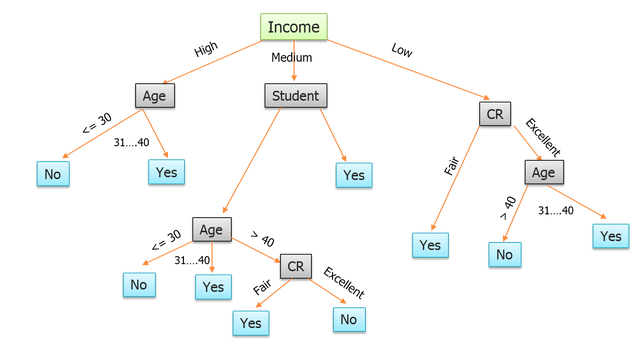

In [3]:
no = "045"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

### 특징  
* 설명하기가 아주 편하고 직관적임!  
* 크기가 커지면 오버비팅이 심할 수 있음 
* 실질적으로 성능이 아주 좋지가 않아서, 일반적으로 잘 사용은 하지 않음  
* 다만, 요즘 단순 Decision Tree를 사용하지 않고, Random Forest나 다른 방식의 Tree를 많이 사용한다.  
* 예전에는 일단  Random Forest 에 넣어서 확인을 하고 사용했다면, 요즘은 Random Forest나 Xgboost 를 Random Forest 대용을 더 많이 사용하고 있다.

## 참고 : Scikit-Learn의 preprocessing  관련 사항  
* 스케일링[scaling] : 자료 크기 조정  
(목적 : overflow, underflow 를 방지하고, 독립변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴속도 향상)
scale - StandardScaler[표준정상분포 Standard Normal Gaussian 기본 스케일]  
normalize - Normalizer  
minmax_scale - MinMaxScaler[최대/최소값 사용]  
maxabs_scale - MaxAbsScaler[최대절대값 사용]  
robust_scale - RobustScaler[median, interquartile range 사용. outlier 영향 최소화]  

* 인코딩[Encoding]: 카테고리 값의 정수 표현  
(인코딩 : 카테고리 값이나 텍스트 정보를 처리할 수 있는 정수로 변환하는 프로세스)  
binarize - Binarizer[th 값을 기준으로 0/1로 처리하는 것]  
label_binarize - LabelBinarizer[onehot과 유사하지만, 사용되는 카테고리만 사용하여 컬럼으로 ]  
LabelEncoder[k 개의 종류가 있다면 0~k-1까지의 정수로 단순히 변경해서 수행]  
OneHotEncoder[k개의 값을 가지는 스칼라 값을 0또는 1의 값을 가지는 k차원의 벡터로 변환]  
DictVectorizer[주로 텍스트에서 원드별로 카운트와 관련된 것 처리할 때]  

* Imputation: 결손 데이터(missing data) 처리  
Imputer

* Transform: 데이터 변환 
PolynomialFeatures[x를 1, x, x^2, x^3 ..등으로 표현하는 것]  
FunctionTransformer[Transform으로 f함수 통해서 변형]


* 참고 : One-Hot-Encoder[번주형 변수 처리하는데 많이 사용되는 방법 중 하나]  
범주형 변수로 성별으로 남/여 처럼 되어 있으면 2가지로 코딩이 되는데, 이 보다 많은 종류를 가지게 되는 경우에는 어떻게 할것인가 문제가 된다.  
등급을 10등급으로 한다고 하면, 실제 트리상에서는 2^10으로 1024가지의 경우를 판단해야 한다.  
그래서 거의 32개로 되어 있으면, 그 양만해도 2^32으로 심각하게 오버로딩이 많이 걸리게 된다. 
그래서 거의 dummy variable encoding 방식이라고 이해하면 됨.  
아래 그림을 보면 제일 확실히 이해가 됨!  

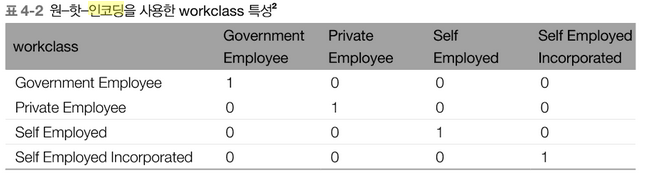

In [4]:
no = "046"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)
# ref : 파이썬 라이브러리를 활용한 머신러닝: 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터~~

## Regression Tree

*  data : Hitters.csv[야구 선수 급여]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics  

%matplotlib inline


In [56]:
path = "data/Hitters.csv"
Hitters = pd.read_csv(path)
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 53.0+ KB


In [5]:
Hitters.head(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


* 관찰 데이터 : 322  
* 컬럼 : 21개[ Unnamed: 0 , League, Division, NewLeague 은 숫자형 데이터가 아님 ]  
* 결과 변수 :  'Salary'는 263개 but 전체 322개 데이터 중에서 실제 salary 데이터가 263개만 있음;;;;;;

### 데이터 처리  
* salary 의 값이 없는 observation 제거  
* Unnamed:0 컬럼이름 변경 & - 제거  
* 결과 변수 salary의 log변환

In [11]:
X = Hitters.loc[:,['Years', 'Hits']]     
y = Hitters.Salary                       

reg_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3) 
reg_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

* 원래 pydotplus를 이용해서 보여주는데, 지금 해당 패키지가 유지보수중이라서 다른 형식으로 처리함.

Text(13, 180, 'R3')

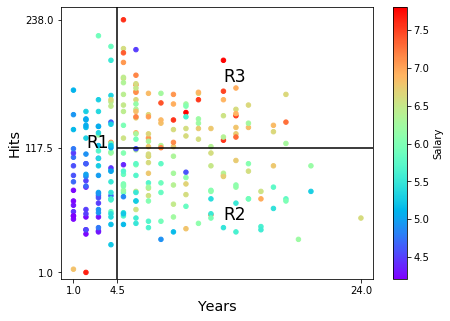

In [12]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))          

Hitters.plot('Years','Hits', kind='scatter',c = 'Salary',
             ax=ax1, xticks=[1, 4.5, 24], yticks=[1, 117.5, 238], 
             xlim=[0, 25], ylim=[-5, 250], cmap='rainbow') 

plt.xlabel('Years', fontsize='x-large')
plt.ylabel('Hits', fontsize='x-large')
plt.vlines(4.5,  ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize=17)
plt.annotate('R2', xy=(13,50), fontsize=17)
plt.annotate('R3', xy=(13,180), fontsize=17)

In [13]:
reg_tree.tree_.threshold

array([  4.5,  -2. , 117.5,  -2. ,  -2. ])

? 아래는 윈도우에서 아래 pydotplus의 기능이 graphviz 로 인해서 안 될 경우.
먼저 구글의 graphviz 에 가서 윈도우 용으로 설치를 한 이후에...       
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


In [ ]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

/Users/minkyukwon/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


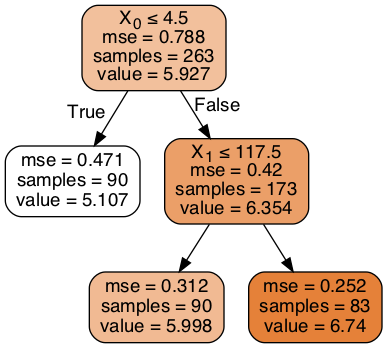

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [1]:
no = "047"
w = 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

NameError: name 'Image' is not defined